<a href="https://colab.research.google.com/github/jamesodukoya/TwoLayerNeuralNetwork/blob/main/Solving_a_Classification_Problem_with_a_Two_Layer_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving a Classification Problem with a Two-Layer Neural Network

In this project, I built a simple neural network with two layers and trained it to solve a classification problem.

**In general, the project covers the following:**

- Implementation of a neural network with two layers on a classification problem
- Forward propagation using matrix multiplication
- Backward propagation (optimizing the neural network parameters) using the gradient descent method

# Table of Contents

- [ 1 - Classification Problem](#1)
- [ 2 - Neural Network Model with Two Layers](#2)
  - [ 2.1 - Neural Network Model with Two Layers for a Single Training Example](#2.1)
  - [ 2.2 - Neural Network Model with Two Layers for Multiple Training Examples](#2.2)
  - [ 2.3 - Cost Function and Training](#2.3)
  - [ 2.4 - Dataset](#2.4)
  - [ 2.5 - Define Activation Function](#2.5)
- [ 3 - Implementation of the Neural Network Model with Two Layers](#3)
  - [ 3.1 - Defining the Neural Network Structure](#3.1)
  - [ 3.2 - Initialize the Model's Parameters](#3.2)
  - [ 3.3 - The Loop](#3.3)
  - [ 3.4 - Integrating all the Functions into One Model](#3.4)
- [ 4 - Experimenting With Another Dataset](#4)

## Packages

First, let's import all the packages we need.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
# A function to create a dataset.
from sklearn.datasets import make_blobs

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline

# Set a seed so that the results are consistent.
np.random.seed(3)

<a name='1'></a>
## 1 - Classification Problem

Let's explore a little complicated classification problem where we have two classes, but the data is distributed in such a manner that makes it impossible for one line to separate them.

[]

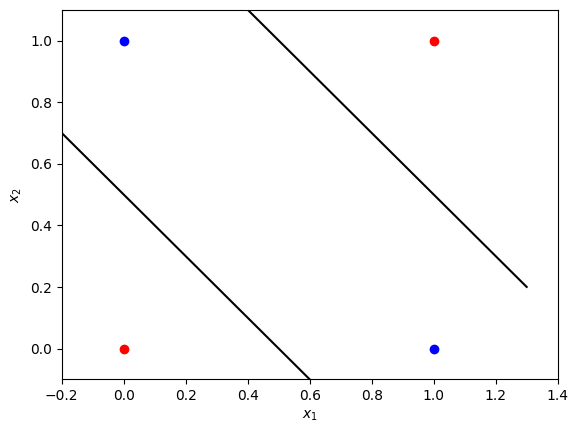

In [ ]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
x_line = np.arange(xmin, xmax, 0.1)
# Data points (observations) from two classes.
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="b")
ax.scatter(1, 0, color="b")
ax.scatter(1, 1, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
# Example of the lines which can be used as a decision boundary to separate two classes.
ax.plot(x_line, -1 * x_line + 1.5, color="black")
ax.plot(x_line, -1 * x_line + 0.5, color="black")
plt.plot()

In this case, we need to feed our data points (coordinates $x_1$, $x_2$) into two nodes separately and then unify them with another one to make a decision.

To do this, we'll build and train a multi-layer neural network!

<a name='2'></a>
## 2 - Neural Network Model with Two Layers

<a name='2.1'></a>
### 2.1 - Neural Network Model with Two Layers for a Single Training Example

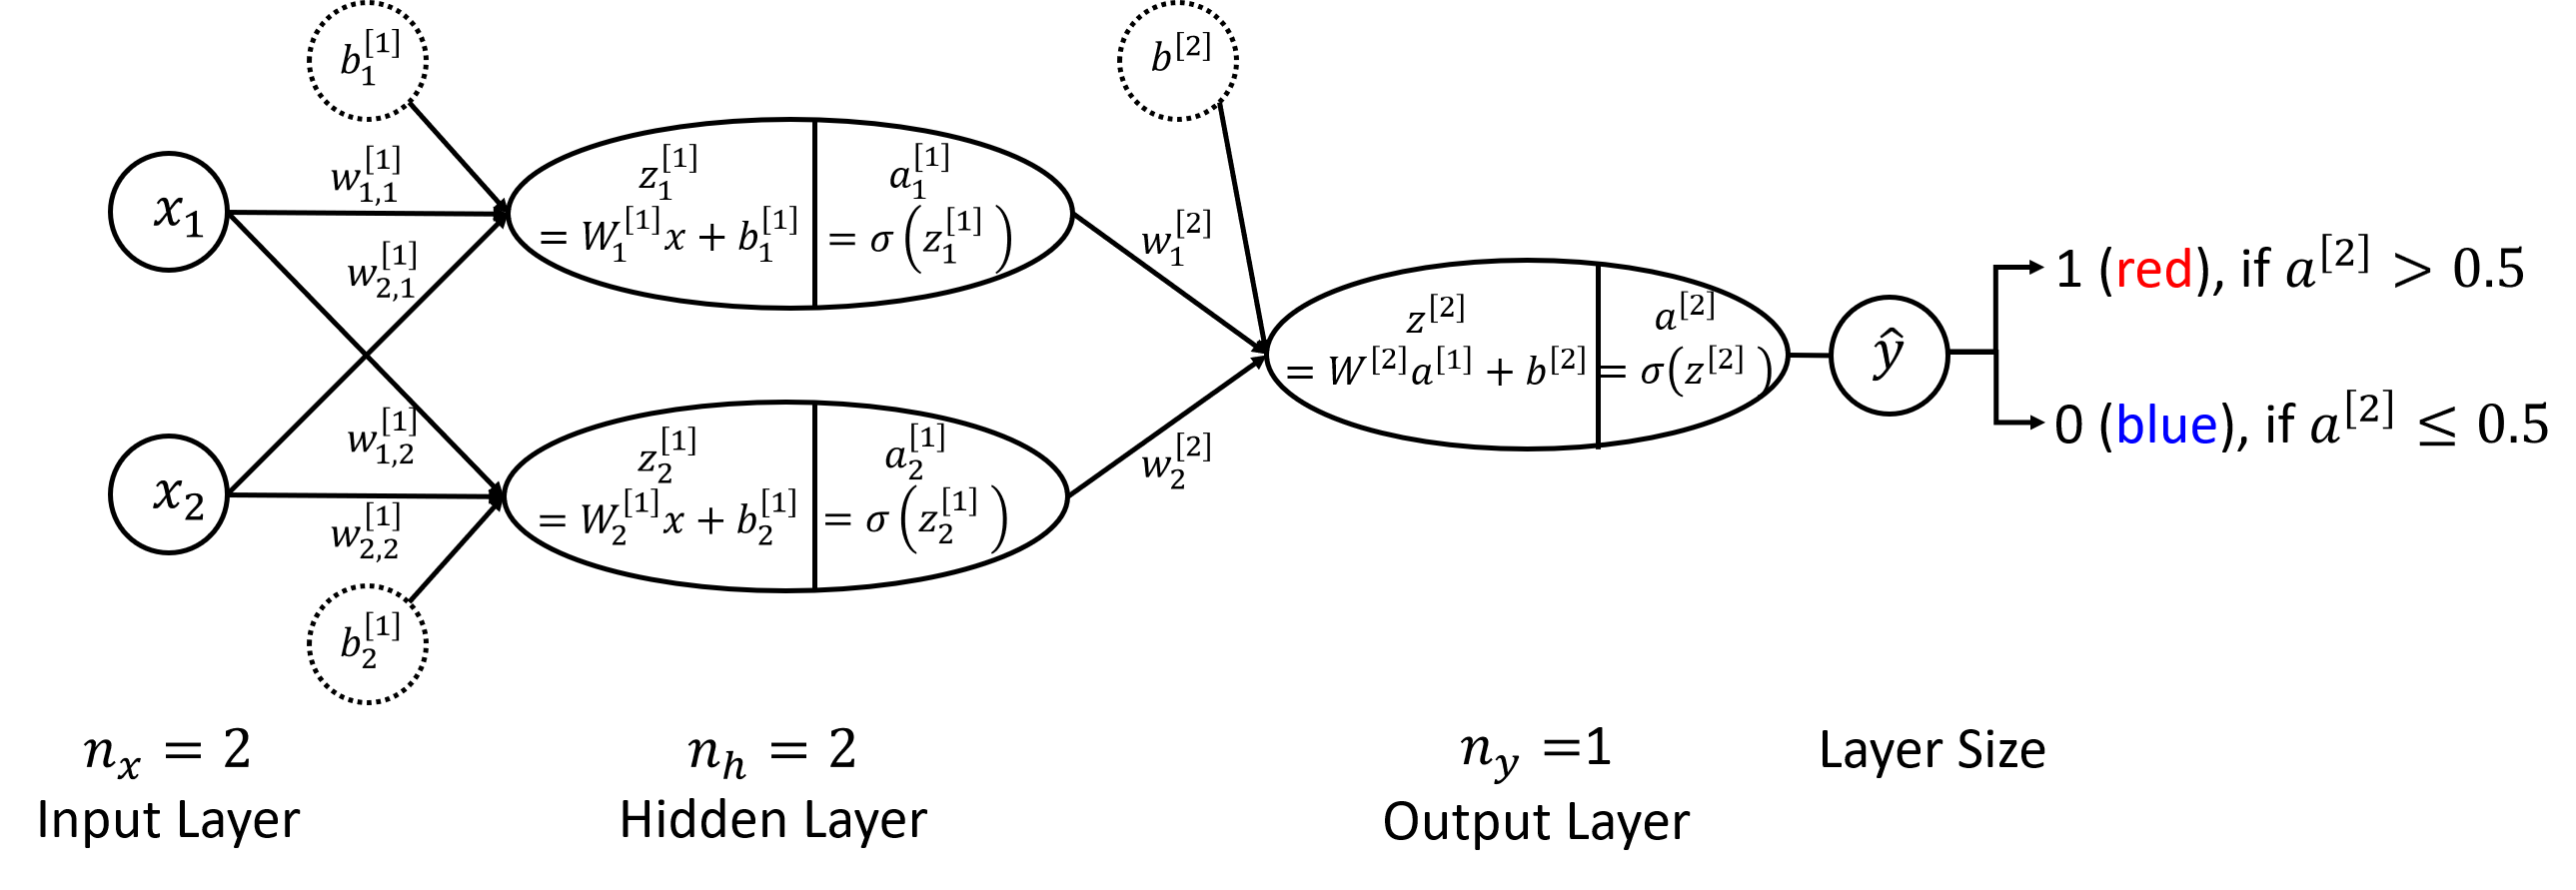

Our training examples $x^{(i)}=\begin{bmatrix}x_1^{(i)} \\ x_2^{(i)}\end{bmatrix}$ from the input layer of size $n_x = 2$ are first fed into a hidden layer of size $n_h = 2$. They are simultaneously fed into the first perceptron with weights $W_1^{[1]}=\begin{bmatrix}w_{1,1}^{[1]} & w_{2,1}^{[1]}\end{bmatrix}$, bias  $b_1^{[1]}$; and into the second perceptron with weights $W_2^{[1]}=\begin{bmatrix}w_{1,2}^{[1]} & w_{2,2}^{[1]}\end{bmatrix}$, bias $b_2^{[1]}$.

\begin{align}
z_1^{[1](i)} &= w_{1,1}^{[1]} x_1^{(i)} + w_{2,1}^{[1]} x_2^{(i)} + b_1^{[1]} = W_1^{[1]}x^{(i)} + b_1^{[1]},\\
z_2^{[1](i)} &= w_{1,2}^{[1]} x_1^{(i)} + w_{2,2}^{[1]} x_2^{(i)} + b_2^{[1]} = W_2^{[1]}x^{(i)} + b_2^{[1]}.\tag{1}
\end{align}

These expressions for one training example $x^{(i)}$ can be rewritten in a matrix form :

$$z^{[1](i)} = W^{[1]} x^{(i)} + b^{[1]},\tag{2}$$

where

&emsp; &emsp; $z^{[1](i)} = \begin{bmatrix}z_1^{[1](i)} \\ z_2^{[1](i)}\end{bmatrix}$ is vector of size $\left(n_h \times 1\right) = \left(2 \times 1\right)$;

&emsp; &emsp; $W^{[1]} = \begin{bmatrix}W_1^{[1]} \\ W_2^{[1]}\end{bmatrix} =
\begin{bmatrix}w_{1,1}^{[1]} & w_{2,1}^{[1]} \\ w_{1,2}^{[1]} & w_{2,2}^{[1]}\end{bmatrix}$ is matrix of size $\left(n_h \times n_x\right) = \left(2 \times 2\right)$;

&emsp; &emsp; $b^{[1]} = \begin{bmatrix}b_1^{[1]} \\ b_2^{[1]}\end{bmatrix}$ is vector of size $\left(n_h \times 1\right) = \left(2 \times 1\right)$.

Next, the hidden layer activation function needs to be applied for each of the elements in the vector $z^{[1](i)}$. Various activation functions can be used here but in this model, we will stick with the sigmoid function $\sigma\left(x\right) = \frac{1}{1 + e^{-x}}$. Its derivative is $\frac{d\sigma}{dx} = \sigma\left(x\right)\left(1-\sigma\left(x\right)\right)$ and the output of the hidden layer is a vector of size $\left(n_h \times 1\right) = \left(2 \times 1\right)$:

$$a^{[1](i)} = \sigma\left(z^{[1](i)}\right) =
\begin{bmatrix}\sigma\left(z_1^{[1](i)}\right) \\ \sigma\left(z_2^{[1](i)}\right)\end{bmatrix}.\tag{3}$$

Then the hidden layer output gets fed into the output layer of size $n_y = 1$:

$$z^{[2](i)} = w_1^{[2]} a_1^{[1](i)} + w_2^{[2]} a_2^{[1](i)} + b^{[2]}= W^{[2]} a^{[1](i)} + b^{[2]},\tag{4}$$

&emsp; &emsp; $z^{[2](i)}$ and $b^{[2]}$ are scalars for this model, as $\left(n_y \times 1\right) = \left(1 \times 1\right)$;

&emsp; &emsp; $W^{[2]} = \begin{bmatrix}w_1^{[2]} & w_2^{[2]}\end{bmatrix}$ is vector of size $\left(n_y \times n_h\right) = \left(1 \times 2\right)$.

Finally, the same sigmoid function is used as the output layer activation function:

$$a^{[2](i)} = \sigma\left(z^{[2](i)}\right).\tag{5}$$

Mathematically, the two layer neural network model for each training example $x^{(i)}$ can be written with the expressions $(2) - (5)$. Let's rewrite them next to each other for convenience:

\begin{align}
z^{[1](i)} &= W^{[1]} x^{(i)} + b^{[1]},\\
a^{[1](i)} &= \sigma\left(z^{[1](i)}\right),\\
z^{[2](i)} &= W^{[2]} a^{[1](i)} + b^{[2]},\\
a^{[2](i)} &= \sigma\left(z^{[2](i)}\right).\\
\tag{6}
\end{align}

Finally, the predictions for some example $x^{(i)}$ can be made taking the output $a^{[2](i)}$ and calculating $\hat{y}$ as: $\hat{y} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5, \\ 0 & \mbox{otherwise }. \end{cases}$.

<a name='2.2'></a>
### 2.2 - Neural Network Model with Two Layers for Multiple Training Examples

To achieve higher accuracy, $m$ training examples can be organised in a matrix $X$ of a shape ($2 \times m$), putting $x^{(i)}$ into columns. Then the model $(6)$ can be rewritten in terms of matrix multiplications:

\begin{align}
Z^{[1]} &= W^{[1]} X + b^{[1]},\\
A^{[1]} &= \sigma\left(Z^{[1]}\right),\\
Z^{[2]} &= W^{[2]} A^{[1]} + b^{[2]},\\
A^{[2]} &= \sigma\left(Z^{[2]}\right),\\
\tag{7}
\end{align}

where $b^{[1]}$ is broadcasted to the matrix of size $\left(n_h \times m\right) = \left(2 \times m\right)$ and $b^{[2]}$ to the vector of size $\left(n_y \times m\right) = \left(1 \times m\right)$.

<a name='2.3'></a>
### 2.3 - Cost Function and Training

For the evaluation of this simple neural network, log loss cost function. Originally initialized weights were just some random values, we you need to perform training of the model—find such set of parameters $W^{[1]}$, $b^{[1]}$, $W^{[2]}$, $b^{[2]}$, that will minimize the cost function:


$$\mathcal{L}\left(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}\right) = \frac{1}{m}\sum_{i=1}^{m} L\left(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}\right) =  \frac{1}{m}\sum_{i=1}^{m}  \large\left(\small - y^{(i)}\log\left(a^{[2](i)}\right) - (1-y^{(i)})\log\left(1- a^{[2](i)}\right)  \large  \right), \small\tag{8}$$

where $y^{(i)} \in \{0,1\}$ are the original labels and $a^{[2](i)}$ are the continuous output values of the forward propagation step (elements of array $A^{[2]}$).

To minimize it, we'll use gradient descent to update the parameters with the following expressions:

\begin{align}
W^{[1]} &= W^{[1]} - \alpha \frac{\partial \mathcal{L} }{ \partial W^{[1]} },\\
b^{[1]} &= b^{[1]} - \alpha \frac{\partial \mathcal{L} }{ \partial b^{[1]} },\\
W^{[2]} &= W^{[2]} - \alpha \frac{\partial \mathcal{L} }{ \partial W^{[2]} },\\
b^{[2]} &= b^{[2]} - \alpha \frac{\partial \mathcal{L} }{ \partial b^{[2]} },\\
\tag{9}
\end{align}

where $\alpha$ is the learning rate.

Now, let's calculate $\frac{\partial \mathcal{L} }{ \partial W^{[1]}}$, $\frac{\partial \mathcal{L} }{ \partial b^{[1]}}$, $\frac{\partial \mathcal{L} }{ \partial W^{[2]}}$, $\frac{\partial \mathcal{L} }{ \partial b^{[2]}}$.

After calculating the derivatives, here are the corresponding expressions for $\frac{\partial \mathcal{L} }{ \partial W }$ and $\frac{\partial \mathcal{L} }{ \partial b }$:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W } &=
\frac{1}{m}\left(A-Y\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b } &=
\frac{1}{m}\left(A-Y\right)\mathbf{1},\\
\end{align}

where $\mathbf{1}$ is just a ($m \times 1$) vector of ones. Your one perceptron is in the second layer now, so $W$ will be exchanged with $W^{[2]}$, $b$ with $b^{[2]}$, $A$ with $A^{[2]}$, $X$ with $A^{[1]}$:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W^{[2]} } &=
\frac{1}{m}\left(A^{[2]}-Y\right)\left(A^{[1]}\right)^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[2]} } &=
\frac{1}{m}\left(A^{[2]}-Y\right)\mathbf{1}.\\
\tag{10}
\end{align}


Let's now find the Hessian matrix, $\frac{\partial \mathcal{L} }{ \partial W^{[1]}} =
\begin{bmatrix}
\frac{\partial \mathcal{L} }{ \partial w_{1,1}^{[1]}} & \frac{\partial \mathcal{L} }{ \partial w_{2,1}^{[1]}} \\
\frac{\partial \mathcal{L} }{ \partial w_{1,2}^{[1]}} & \frac{\partial \mathcal{L} }{ \partial w_{2,2}^{[1]}} \end{bmatrix}$. By solving the second derivative, we will find that $$\frac{\partial \mathcal{L} }{ \partial w_{1,1}^{[1]}}=\frac{1}{m}\sum_{i=1}^{m} \left(
\left(a^{[2](i)} - y^{(i)}\right)
w_1^{[2]}
\left(a_1^{[1](i)}\left(1-a_1^{[1](i)}\right)\right)
x_1^{(i)}\right)\tag{11}$$

Applying this accurately for each of the elements $\frac{\partial \mathcal{L} }{ \partial W^{[1]}}$, we get the following matrix:

$$\frac{\partial \mathcal{L} }{ \partial W^{[1]}} = \begin{bmatrix}
\frac{\partial \mathcal{L} }{ \partial w_{1,1}^{[1]}} & \frac{\partial \mathcal{L} }{ \partial w_{2,1}^{[1]}} \\
\frac{\partial \mathcal{L} }{ \partial w_{1,2}^{[1]}} & \frac{\partial \mathcal{L} }{ \partial w_{2,2}^{[1]}} \end{bmatrix}$$
$$= \frac{1}{m}\begin{bmatrix}
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_1^{[2]} \left(a_1^{[1](i)}\left(1-a_1^{[1](i)}\right)\right)
x_1^{(i)}\right) &
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_1^{[2]} \left(a_1^{[1](i)}\left(1-a_1^{[1](i)}\right)\right)
x_2^{(i)}\right)  \\
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_2^{[2]} \left(a_2^{[1](i)}\left(1-a_2^{[1](i)}\right)\right)
x_1^{(i)}\right) &
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_2^{[2]} \left(a_2^{[1](i)}\left(1-a_2^{[1](i)}\right)\right)
x_2^{(i)}\right)\end{bmatrix}\tag{12}$$

Considering that all terms and indices are very consistent, it all can be unified into a matrix form. $\left(W^{[2]}\right)^T = \begin{bmatrix}w_1^{[2]} \\ w_2^{[2]}\end{bmatrix}$ of size $\left(n_h \times n_y\right) = \left(2 \times 1\right)$ can be multiplied with the vector $A^{[2]} - Y$ of size $\left(n_y \times m\right) = \left(1 \times m\right)$, resulting in a matrix of size $\left(n_h \times m\right) = \left(2 \times m\right)$:

$$\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)=
\begin{bmatrix}w_1^{[2]} \\ w_2^{[2]}\end{bmatrix}
\begin{bmatrix}\left(a^{[2](1)} - y^{(1)}\right) &  \cdots & \left(a^{[2](m)} - y^{(m)}\right)\end{bmatrix}
=\begin{bmatrix}
\left(a^{[2](1)} - y^{(1)}\right) w_1^{[2]} & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_1^{[2]} \\
\left(a^{[2](1)} - y^{(1)}\right) w_2^{[2]} & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_2^{[2]} \end{bmatrix}$$.

Now taking matrix $A^{[1]}$ of the same size $\left(n_h \times m\right) = \left(2 \times m\right)$,

$$A^{[1]}
=\begin{bmatrix}
a_1^{[1](1)} & \cdots & a_1^{[1](m)} \\
a_2^{[1](1)} & \cdots & a_2^{[1](m)} \end{bmatrix},$$

we are able to calculate:

$$A^{[1]}\cdot\left(1-A^{[1]}\right)
=\begin{bmatrix}
a_1^{[1](1)}\left(1 - a_1^{[1](1)}\right) & \cdots & a_1^{[1](m)}\left(1 - a_1^{[1](m)}\right) \\
a_2^{[1](1)}\left(1 - a_2^{[1](1)}\right) & \cdots & a_2^{[1](m)}\left(1 - a_2^{[1](m)}\right) \end{bmatrix},$$

where "$\cdot$" denotes **element by element** multiplication.

With the element by element multiplication,

$$\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)=\begin{bmatrix}
\left(a^{[2](1)} - y^{(1)}\right) w_1^{[2]}\left(a_1^{[1](1)}\left(1 - a_1^{[1](1)}\right)\right) & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_1^{[2]}\left(a_1^{[1](m)}\left(1 - a_1^{[1](m)}\right)\right) \\
\left(a^{[2](1)} - y^{(1)}\right) w_2^{[2]}\left(a_2^{[1](1)}\left(1 - a_2^{[1](1)}\right)\right) & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_2^{[2]} \left(a_2^{[1](m)}\left(1 - a_2^{[1](m)}\right)\right) \end{bmatrix}.$$

If we perform matrix multiplication with $X^T$ of size $\left(m \times n_x\right) = \left(m \times 2\right)$, we will get matrix of size $\left(n_h \times n_x\right) = \left(2 \times 2\right)$:

$$\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)X^T =
\begin{bmatrix}
\left(a^{[2](1)} - y^{(1)}\right) w_1^{[2]}\left(a_1^{[1](1)}\left(1 - a_1^{[1](1)}\right)\right) & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_1^{[2]}\left(a_1^{[1](m)}\left(1 - a_1^{[1](m)}\right)\right) \\
\left(a^{[2](1)} - y^{(1)}\right) w_2^{[2]}\left(a_2^{[1](1)}\left(1 - a_2^{[1](1)}\right)\right) & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_2^{[2]} \left(a_2^{[1](m)}\left(1 - a_2^{[1](m)}\right)\right) \end{bmatrix}
\begin{bmatrix}
x_1^{(1)} & x_2^{(1)} \\
\cdots & \cdots \\
x_1^{(m)} & x_2^{(m)}
\end{bmatrix}$$
$$=\begin{bmatrix}
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_1^{[2]} \left(a_1^{[1](i)}\left(1 - a_1^{[1](i)}\right) \right)
x_1^{(i)}\right) &
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_1^{[2]} \left(a_1^{[1](i)}\left(1-a_1^{[1](i)}\right)\right)
x_2^{(i)}\right)  \\
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_2^{[2]} \left(a_2^{[1](i)}\left(1-a_2^{[1](i)}\right)\right)
x_1^{(i)}\right) &
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_2^{[2]} \left(a_2^{[1](i)}\left(1-a_2^{[1](i)}\right)\right)
x_2^{(i)}\right)\end{bmatrix}$$

This is exactly like in the expression $(12)$! So, $\frac{\partial \mathcal{L} }{ \partial W^{[1]}}$ can be written as a mixture of multiplications:

$$\frac{\partial \mathcal{L} }{ \partial W^{[1]}} = \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)X^T\tag{13},$$

where "$\cdot$" denotes element by element multiplications.

Vector $\frac{\partial \mathcal{L} }{ \partial b^{[1]}}$ can be found very similarly, but the last terms in the chain rule will be equal to $1$, i.e. $\frac{\partial z_1^{[1](i)}}{ \partial b_1^{[1]}} = 1$. Thus,

$$\frac{\partial \mathcal{L} }{ \partial b^{[1]}} = \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)\mathbf{1},\tag{14}$$

where $\mathbf{1}$ is a ($m \times 1$) vector of ones.

Expressions $(10)$, $(13)$ and $(14)$ can be used for the parameters update $(9)$ performing backward propagation:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W^{[2]} } &=
\frac{1}{m}\left(A^{[2]}-Y\right)\left(A^{[1]}\right)^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[2]} } &=
\frac{1}{m}\left(A^{[2]}-Y\right)\mathbf{1},\\
\frac{\partial \mathcal{L} }{ \partial W^{[1]}} &= \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[1]}} &= \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)\mathbf{1},\\
\tag{15}
\end{align}

where $\mathbf{1}$ is a ($m \times 1$) vector of ones.

<a name='2.2'></a>
### 2.2 - Dataset

Having set the mathematical premise for our project, let's get the dataset we will be working on. The following code will create $m=2000$ data points $(x_1, x_2)$ and save them in the `NumPy` array `X` of a shape $(2 \times m)$ (in the columns of the array). The labels ($0$: blue, $1$: red) will be saved in the `NumPy` array `Y` of a shape $(1 \times m)$.

The shape of X is: (2, 2000)
The shape of Y is: (1, 2000)
I have m = 2000 training examples!


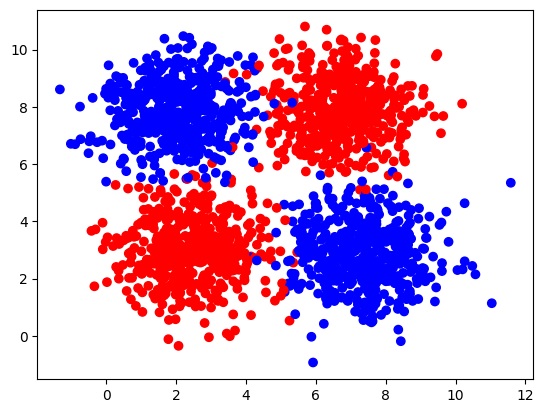

In [ ]:
m = 2000
samples, labels = make_blobs(n_samples=m,
                             centers=([2.5, 3], [6.7, 7.9], [2.1, 7.9], [7.4, 2.8]),
                             cluster_std=1.1,
                             random_state=0)
labels[(labels == 0) | (labels == 1)] = 1
labels[(labels == 2) | (labels == 3)] = 0
X = np.transpose(samples)
Y = labels.reshape((1, m))

plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']));

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(Y.shape))
print ('I have m = %d training examples!' % (m))

<a name='2.3'></a>
### 2.3 - Define Activation Function

<a name='ex01'></a>
First, let's define the sigmoid activation function $\sigma\left(z\right) =\frac{1}{1+e^{-z}} $.

In [ ]:
def sigmoid(z):
    res = 1/(1+1/np.exp(z))

    return res

In [ ]:
print("sigmoid(-2) = " + str(sigmoid(-2)))
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid(3.5) = " + str(sigmoid(3.5)))

sigmoid(-2) = 0.11920292202211757
sigmoid(0) = 0.5
sigmoid(3.5) = 0.9706877692486436


<a name='3'></a>
## 3 - Implementation of the Neural Network Model with Two Layers

<a name='3.1'></a>
### 3.1 - Defining the Neural Network Structure

<a name='ex02'></a>

Next, we'll define three sizes of the three layers:
- `n_x`: the size of the input layer
- `n_h`: the size of the hidden layer (set it equal to 2 for now)
- `n_y`: the size of the output layer

In [ ]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    # Size of input layer.
    n_x = X.shape[0]
    # Size of hidden layer.
    n_h = 2
    # Size of output layer.
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [ ]:
(n_x, n_h, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 2
The size of the output layer is: n_y = 1


<a name='3.2'></a>
### 3.2 - Initialize the Model's Parameters

<a name='ex03'></a>

Now, we need to intialize the parameters of our model randomly using the function `initialize_parameters()`.

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    #Initialize the weights matrix with random values
    W1 = np.random.randn(n_h, n_x) * 0.01
    #Initialize the bias vector as zeros.
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [ ]:
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651 ]
 [ 0.00096497 -0.01863493]]
b1 = [[0.]
 [0.]]
W2 = [[-0.00277388 -0.00354759]]
b2 = [[0.]]


<a name='3.3'></a>
### 3.3 - The Loop

<a name='ex04'></a>
Next, let's implement a `forward_propagation()`function to compute the output function.

- We need to focus on the mathematical representation $(7)$ of our classifier (section [2.2](#2.2)):
\begin{align}
Z^{[1]} &= W^{[1]} X + b^{[1]},\\
A^{[1]} &= \sigma\left(Z^{[1]}\right),\\
Z^{[2]} &= W^{[2]} A^{[1]} + b^{[2]},\\
A^{[2]} &= \sigma\left(Z^{[2]}\right).\\
\end{align}
- To successfully complete forward propagation, we need to:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Compute `Z1` multiplying matrices `W1`, `X` and adding vector `b1`. Then find `A1` using the `sigmoid` activation function. Perform similar computations for `Z2` and `A2`.

In [ ]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing our parameters (output of initialization function)

    Returns:
    A2 -- the sigmoid output of the second activation
    cache -- python dictionary containing Z1, A1, Z2, A2
    (that simplifies the calculations in the back propagation step)
    """
    # Retrieve each parameter from the dictionary "parameters".
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Implement forward propagation to calculate A2.
    Z1 = W1@X + b1
    A1 = sigmoid(Z1)
    Z2 = W2@A1 + b2
    A2 = sigmoid(Z2)

    assert(A2.shape == (n_y, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [ ]:
A2, cache = forward_propagation(X, parameters)

print(A2)

[[0.49920157 0.49922234 0.49921223 ... 0.49921215 0.49921043 0.49920665]]


<a name='ex05'></a>
### Defining the Cost Function

We will train the model using the log loss cost function below:

$$\mathcal{L}\left(W, b\right)  = \frac{1}{m}\sum_{i=1}^{m}  \large\left(\small - y^{(i)}\log\left(a^{(i)}\right) - (1-y^{(i)})\log\left(1- a^{(i)}\right)  \large  \right) \small.$$

In [ ]:
def compute_cost(A2, Y):
    """
    Computes the cost function as a log loss

    Arguments:
    A2 -- The output of the neural network of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- log loss

    """
    # Number of examples.
    m = Y.shape[1]

    logloss = -(np.log(A2)@Y.T)-(np.log(1-A2)@(1-Y).T)
    cost = 1/m * np.sum(logloss)

    assert(isinstance(cost, float))

    return cost

In [ ]:
print("cost = " + str(compute_cost(A2, Y)))

cost = 0.693147770382682


Calculate partial derivatives as shown in $(15)$:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W^{[2]} } &=
\frac{1}{m}\left(A^{[2]}-Y\right)\left(A^{[1]}\right)^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[2]} } &=
\frac{1}{m}\left(A^{[2]}-Y\right)\mathbf{1},\\
\frac{\partial \mathcal{L} }{ \partial W^{[1]}} &= \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[1]}} &= \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)\mathbf{1}.\\
\end{align}

In [ ]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implements the backward propagation, calculating gradients

    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- python dictionary containing Z1, A1, Z2, A2
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)

    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    m = X.shape[1]

    # First, retrieve W from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]

    # Backward propagation: calculate partial derivatives denoted as dW1, db1, dW2, db2 for simplicity.
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

grads = backward_propagation(parameters, cache, X, Y)

print("dW1 = " + str(grads["dW1"]))
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db2"]))

dW1 = [[-1.49856632e-05  1.67791519e-05]
 [-2.12394543e-05  2.43895135e-05]]
db1 = [[5.11207671e-07]
 [7.06236219e-07]]
dW2 = [[-0.00032641 -0.0002606 ]]
db2 = [[-0.00078732]]


<a name='ex06'></a>
We can now update the parameters of our model as shown in $(9)$ (section [2.3](#2.3)):
\begin{align}
W^{[1]} &= W^{[1]} - \alpha \frac{\partial \mathcal{L} }{ \partial W^{[1]} },\\
b^{[1]} &= b^{[1]} - \alpha \frac{\partial \mathcal{L} }{ \partial b^{[1]} },\\
W^{[2]} &= W^{[2]} - \alpha \frac{\partial \mathcal{L} }{ \partial W^{[2]} },\\
b^{[2]} &= b^{[2]} - \alpha \frac{\partial \mathcal{L} }{ \partial b^{[2]} }.\\
\end{align}
- To do this, we will:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Retrieve each derivative from the dictionary "grads" (which is the output of `backward_propagation()`) by using `grads[".."]`.
    3. Update parameters.

In [ ]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule

    Arguments:
    parameters -- python dictionary containing parameters
    grads -- python dictionary containing gradients
    learning_rate -- learning rate for gradient descent

    Returns:
    parameters -- python dictionary containing updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters".
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Retrieve each gradient from the dictionary "grads".
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update rule for each parameter.
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [ ]:
parameters_updated = update_parameters(parameters, grads)

print("W1 updated = " + str(parameters_updated["W1"]))
print("b1 updated = " + str(parameters_updated["b1"]))
print("W2 updated = " + str(parameters_updated["W2"]))
print("b2 updated = " + str(parameters_updated["b2"]))

W1 updated = [[ 0.01790427  0.00434496]
 [ 0.00099046 -0.01866419]]
b1 updated = [[-6.13449205e-07]
 [-8.47483463e-07]]
W2 updated = [[-0.00238219 -0.00323487]]
b2 updated = [[0.00094478]]


<a name='3.4'></a>
### 3.4 - Integrating all the Functions into One Model

<a name='ex07'></a>

Let's build a single neural network model `nn_model()`.

To do this, we need to combine all the previous functions in the right order.

In [ ]:
def nn_model(X, Y, n_h, num_iterations=10, learning_rate=1.2, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    learning_rate -- learning rate parameter for gradient descent
    print_cost -- if True, print the cost every iteration

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    # Initialize parameters.
    parameters = initialize_parameters(n_x, n_h, n_y)

    # Loop.
    for i in range(0, num_iterations):

        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)

        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        cost = compute_cost(A2, Y)

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)

        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [ ]:
parameters = nn_model(X, Y, n_h=2, num_iterations=3000, learning_rate=1.2, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]

Cost after iteration 0: 0.693154
Cost after iteration 1: 0.693150
Cost after iteration 2: 0.693148
Cost after iteration 3: 0.693148
Cost after iteration 4: 0.693148
Cost after iteration 5: 0.693148
Cost after iteration 6: 0.693148
Cost after iteration 7: 0.693148
Cost after iteration 8: 0.693148
Cost after iteration 9: 0.693148
Cost after iteration 10: 0.693148
Cost after iteration 11: 0.693148
Cost after iteration 12: 0.693148
Cost after iteration 13: 0.693148
Cost after iteration 14: 0.693148
Cost after iteration 15: 0.693148
Cost after iteration 16: 0.693148
Cost after iteration 17: 0.693148
Cost after iteration 18: 0.693148
Cost after iteration 19: 0.693148
Cost after iteration 20: 0.693148
Cost after iteration 21: 0.693148
Cost after iteration 22: 0.693148
Cost after iteration 23: 0.693148
Cost after iteration 24: 0.693148
Cost after iteration 25: 0.693148
Cost after iteration 26: 0.693148
Cost after iteration 27: 0.693148
Cost after iteration 28: 0.693148
Cost after iteration 29:

The final model parameters can be used to find the boundary line and for making predictions.

<a name='ex08'></a>
Finally, let's compute probabilities using forward propagation, and implement classification between 0 and 1 using 0.5 as the threshold.

In [ ]:
def predict(X, parameters):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (blue: 0 / red: 1)
    """

    A2, cache = forward_propagation(X, parameters)
    predictions = A2>0.5

    return predictions

In [ ]:
X_pred = np.array([[2, 8, 2, 8], [2, 8, 8, 2]])
Y_pred = predict(X_pred, parameters)

print(f"Coordinates (in the columns):\n{X_pred}")
print(f"Predictions:\n{Y_pred}")

Coordinates (in the columns):
[[2 8 2 8]
 [2 8 8 2]]
Predictions:
[[ True  True False False]]


Let's visualize the boundary line.


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 2')

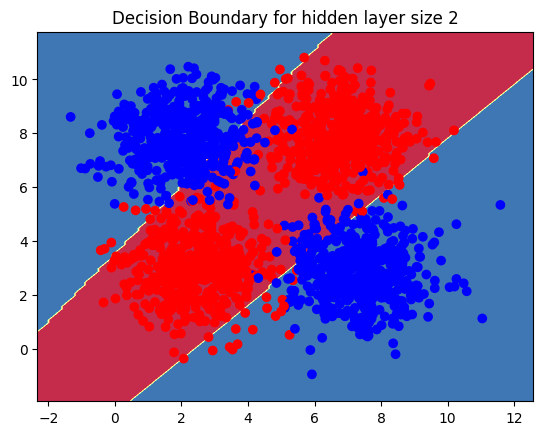

In [ ]:
def plot_decision_boundary(predict, parameters, X, Y):
    # Define bounds of the domain.
    min1, max1 = X[0, :].min()-1, X[0, :].max()+1
    min2, max2 = X[1, :].min()-1, X[1, :].max()+1
    # Define the x and y scale.
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    # Create all of the lines and rows of the grid.
    xx, yy = np.meshgrid(x1grid, x2grid)
    # Flatten each grid to a vector.
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((1, len(r1))), r2.reshape((1, len(r2)))
    # Vertical stack vectors to create x1,x2 input for the model.
    grid = np.vstack((r1,r2))
    # Make predictions for the grid.
    predictions = predict(grid, parameters)
    # Reshape the predictions back into a grid.
    zz = predictions.reshape(xx.shape)
    # Plot the grid of x, y and z values as a surface.
    plt.contourf(xx, yy, zz, cmap=plt.cm.Spectral.reversed())
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']));

# Plot the decision boundary.
plot_decision_boundary(predict, parameters, X, Y)
plt.title("Decision Boundary for hidden layer size " + str(n_h))

Not bad, I guess 😅

<a name='4'></a>
## 4 - Trying Another Dataset

Let's see how our model performs with a slightly different dataset:

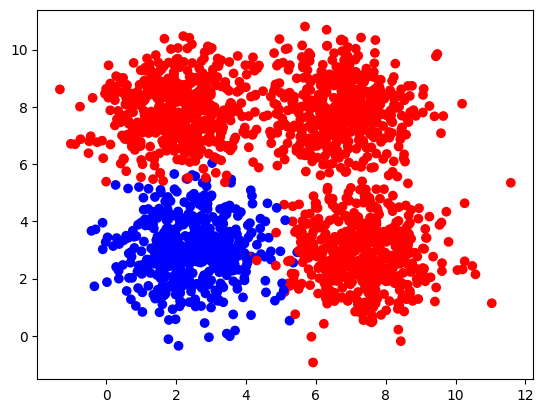

In [ ]:
n_samples = 2000
samples, labels = make_blobs(n_samples=n_samples,
                             centers=([2.5, 3], [6.7, 7.9], [2.1, 7.9], [7.4, 2.8]),
                             cluster_std=1.1,
                             random_state=0)
labels[(labels == 0)] = 0
labels[(labels == 1)] = 1
labels[(labels == 2) | (labels == 3)] = 1
X_2 = np.transpose(samples)
Y_2 = labels.reshape((1,n_samples))

plt.scatter(X_2[0, :], X_2[1, :], c=Y_2, cmap=colors.ListedColormap(['blue', 'red']));

When building our neural network, a number of the nodes in the hidden layer were set as a parameter. We'll now try to change this parameter (1, 2, 15) and investigate the results:

Text(0.5, 1.0, 'Decision Boundary')

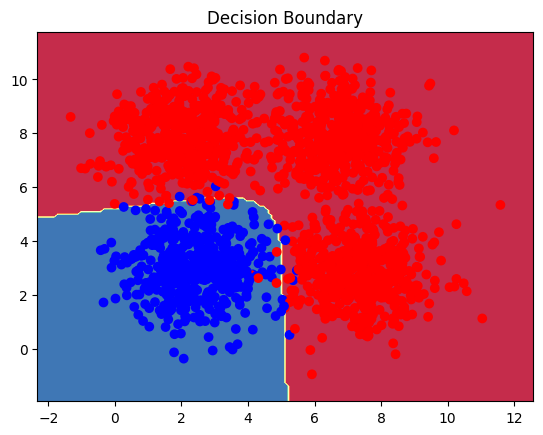

In [ ]:
# parameters_2 = nn_model(X_2, Y_2, n_h=1, num_iterations=3000, learning_rate=1.2, print_cost=False)
parameters_2 = nn_model(X_2, Y_2, n_h=2, num_iterations=3000, learning_rate=1.2, print_cost=False)
# parameters_2 = nn_model(X_2, Y_2, n_h=15, num_iterations=3000, learning_rate=1.2, print_cost=False)

# This function will call predict function
plot_decision_boundary(predict, parameters_2, X_2, Y_2)
plt.title("Decision Boundary")